In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf 

In [9]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock,start,end)


[*********************100%***********************]  1 of 1 completed


In [10]:
data.reset_index(inplace=True)

In [11]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.968765,96.871931,93.603675,95.197945,26452900
2757,2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800
2758,2022-12-16,90.534691,91.421504,89.687736,90.873470,48485500


In [12]:
ma_100_days = data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

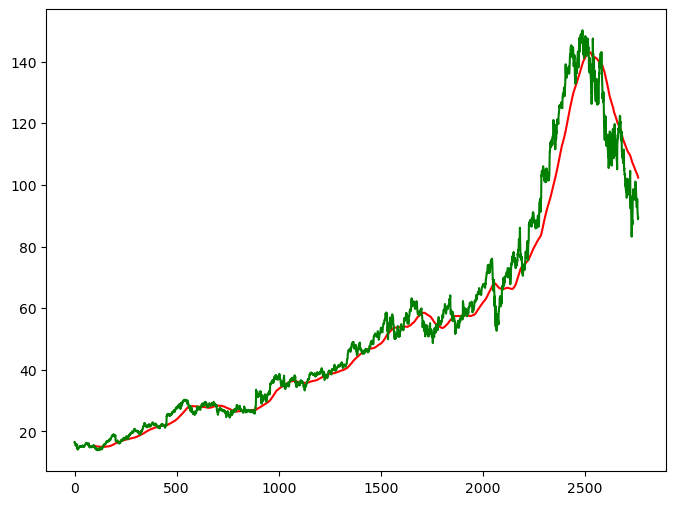

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show

In [14]:
ma_200_days = data.Close.rolling(200).mean()

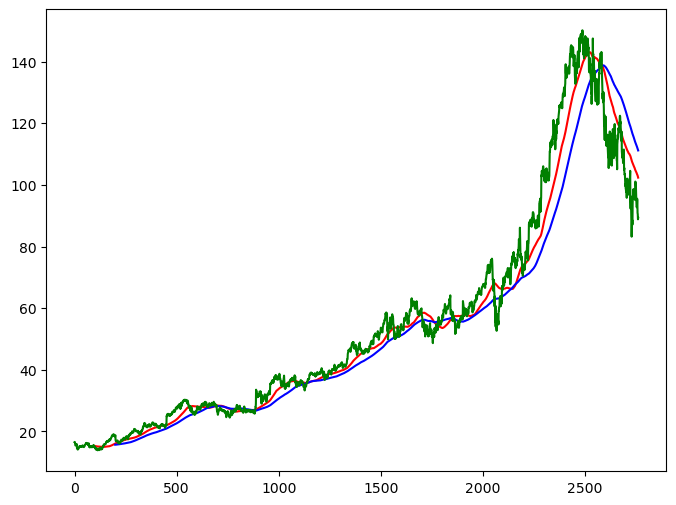

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [16]:
data.dropna(inplace=True)


In [17]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test =  pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])


In [18]:
data_train.shape[0]

2208

In [19]:
data_test.shape[0]

553

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [21]:
data_train_scale = scaler.fit_transform(data_train)

In [22]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [25]:
from keras.layers  import Dense, Dropout , LSTM 
from keras.models import Sequential


2025-02-08 14:39:25.766801: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-08 14:39:25.772995: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-08 14:39:25.827563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-08 14:39:25.871148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739000365.916291    8194 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739000365.92

In [31]:
x,y = np.array(x),np.array(y)

In [37]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True ))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True ))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))



2025-02-08 14:39:27.841379: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/phung/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [42]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 0.0752
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0074
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - loss: 0.0054
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - loss: 0.0051
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - loss: 0.0047
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 242ms/step - loss: 0.0044
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - loss: 0.0044
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 246ms/step - loss: 0.0046
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step - loss: 0.0040
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 239ms/step - loss: 0.0041
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0050
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - loss: 0.0040
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - loss: 0.0034
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - loss: 0.0033
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 2

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [44]:
pas_100_days = data_train.tail(100)

In [45]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [46]:
data_test_scale = scaler.fit_transform(data_test)

In [47]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y = np.array(x),np.array(y)

In [48]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step


In [59]:
scale = 1/scaler.scale_

In [61]:
y_predict= y_predict*scale

In [63]:
y = y*scale

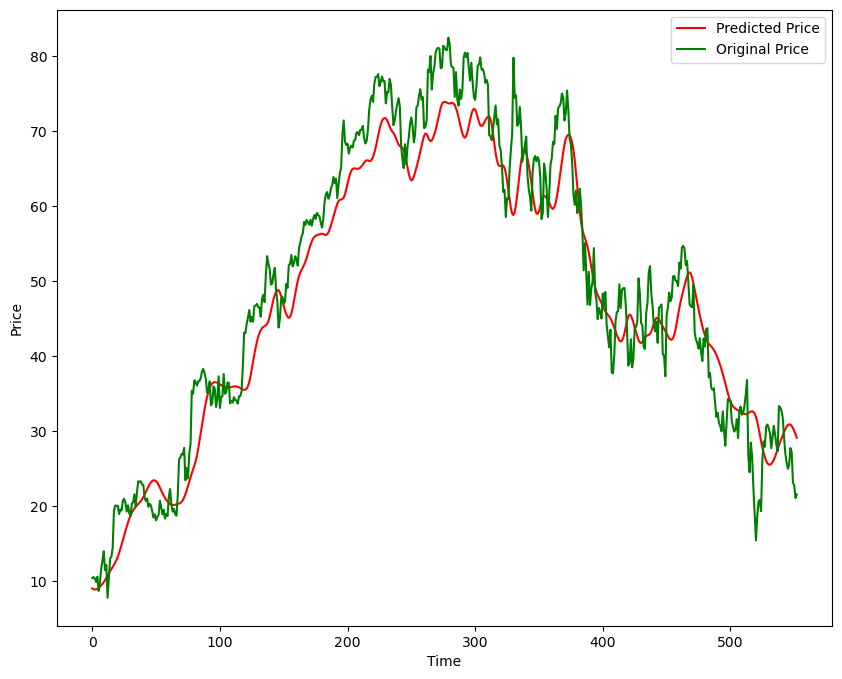

In [67]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label = 'Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [71]:
model.save('Stock Predictions Model.keras')